In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('sales_predictions.csv')

Explora los datos: ¿Qué necesitas para limpiar estos datos?
¿Hay valores faltantes en el conjunto de datos? Es posible que algunas tiendas no informen de todos los datos a causa de problemas técnicos u otros problemas. De ser así, trata con ello apropiadamente.
Aquí hay algunos recursos para que consideres maneras más avanzadas para lidiar con valores faltantes en tu conjunto de datos (revisa los recursos Pandas adicionales opcionales al final de este capítulo para más recursos sobre esto):
Datos faltantes, sus tiopos y métodos estadísticos para lidiar con ellos
6 formas diferentes de compensar los valores faltantes en un conjunto de datos
Valores en un conjunto de datos
Tratamiento de datos fdaltantes: Supuestos y métodos clave para el análisis aplicados


¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?

In [3]:
df.groupby('Outlet_Size')['Outlet_Location_Type'].count()

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Outlet_Location_Type, dtype: int64

In [4]:
df = df.drop_duplicates()

In [5]:
df['Outlet_Size'] = df['Outlet_Size'].dropna()

In [6]:
df[df['Outlet_Size']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [7]:
df['Item_Weight'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

In [8]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [12]:
df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df.Item_Visibility.sort_values(ascending=False)

854     0.328391
3750    0.325781
1805    0.321115
7250    0.311090
2855    0.309390
          ...   
2644    0.000000
5369    0.000000
7653    0.000000
2638    0.000000
3693    0.000000
Name: Item_Visibility, Length: 8523, dtype: float64

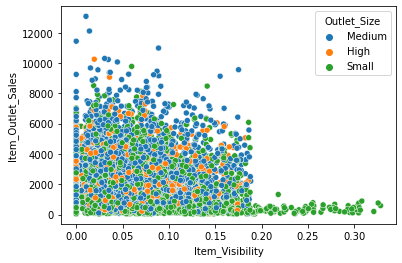

In [14]:
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales",hue='Outlet_Size' , data=df);

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

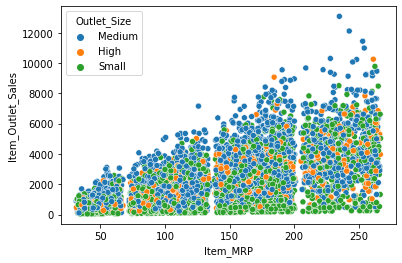

In [15]:
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales",hue='Outlet_Size', data=df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

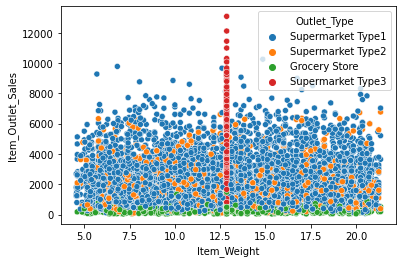

In [16]:
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales",hue='Outlet_Type', data=df)

In [17]:
df[(df['Outlet_Type']=='Supermarket Type3') & (df['Outlet_Size']=='Medium')]['Item_Outlet_Sales'].sort_values(ascending=False)

7188    13086.9648
5223    12117.5600
1450    11445.1020
4349    10993.6896
6541    10306.5840
           ...    
1619      419.4540
8422      417.4566
38        388.1614
5437      293.6178
239       241.6854
Name: Item_Outlet_Sales, Length: 935, dtype: float64

# Parte 4
Histogramas para ver la distribución de varias características en tu conjunto de datos

Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.

Bonus: mapas de calor de las correlaciones entre características

Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

In [18]:
import matplotlib.pyplot as plt

In [19]:
df=  df.dropna(subset=['Outlet_Size'])

In [20]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [21]:
Item_Fat_Content = {'Low Fat': 1,'Regular': 2,'low fat':3,'reg':4,'LF':5}

df.Item_Fat_Content = [Item_Fat_Content[item] for item in df.Item_Fat_Content]

In [22]:
#df.Item_Fat_Content[df.Item_Fat_Content == 'Low Fat'] = 1
#df.Item_Fat_Content[df.Item_Fat_Content == 'Regular'] = 2

## Histogramas variables numéricas

C:\Users\isilvab\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isilvab\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isilvab\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

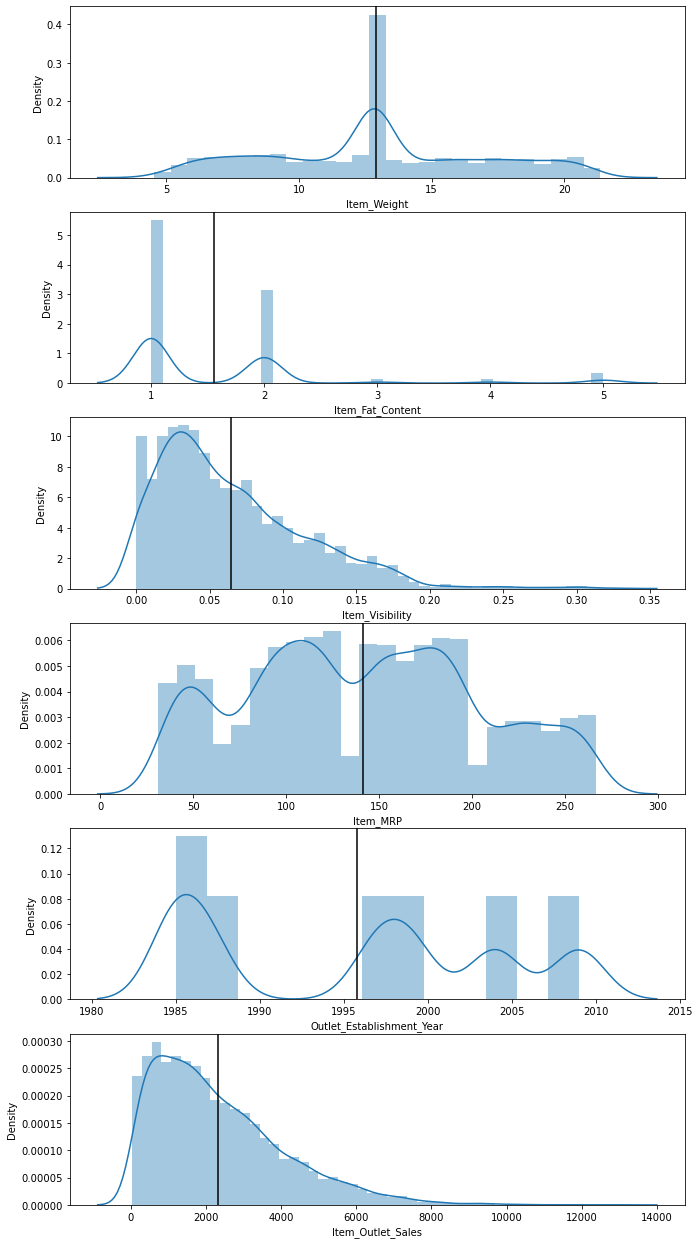

In [23]:

num = df.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

fig, axes = plt.subplots(n, 1, figsize=(28/2.54, 56/2.54))  # create subplots

for ax, col in zip(axes, num):  # For each column...
    sns.distplot(num[col], ax=ax)   # Plot histogaerm
    ax.axvline(num[col].mean(), c='k')  # Plot mean

In [24]:
df.corr().sort_values(by='Item_Outlet_Sales', ascending = False)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Outlet_Sales,0.008007,-0.009387,-0.105854,0.588939,-0.057850,1.000000
Item_MRP,0.029214,-0.001510,-0.000651,1.000000,0.011632,0.588939
Item_Weight,1.000000,-0.020365,-0.008526,0.029214,-0.004779,0.008007
Item_Fat_Content,-0.020365,1.000000,0.027230,-0.001510,0.008227,-0.009387
Outlet_Establishment_Year,-0.004779,0.008227,-0.087452,0.011632,1.000000,-0.057850
Item_Visibility,-0.008526,0.027230,1.000000,-0.000651,-0.087452,-0.105854


In [25]:
corr = df.corr()

<AxesSubplot:>

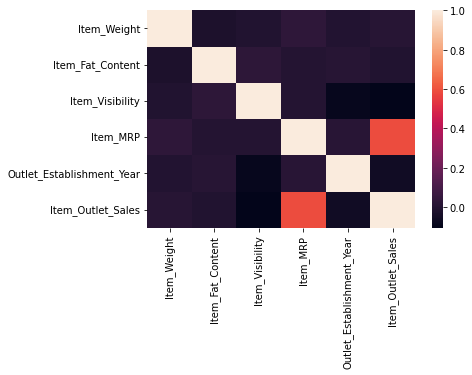

In [26]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [28]:
data = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP']]

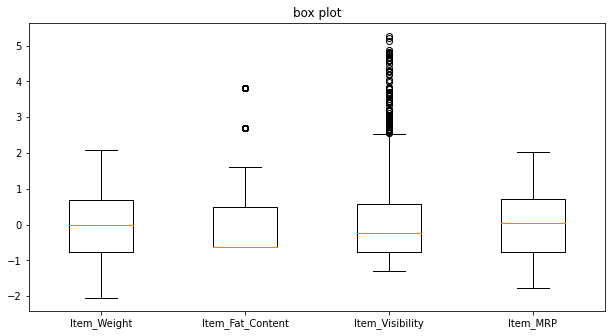

In [29]:
scaledX = scale.fit_transform(data)

fig = plt.figure(figsize =(8, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(scaledX)
#bp = ax.boxplot(data)


# tickslabel
ax.set_xticklabels(['Item_Weight', 'Item_Fat_Content',
                    'Item_Visibility', 'Item_MRP'])
# title  
plt.title("box plot")

# show plot
plt.show()

In [30]:
df = pd.get_dummies(df,columns = {'Outlet_Size','Outlet_Type','Item_Fat_Content'})

In [31]:
df.corr().sort_values(by='Item_Outlet_Sales', ascending = False)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Item_Fat_Content_5,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
Item_Outlet_Sales,0.008007,-0.105854,0.588939,-0.057850,1.000000,-0.350007,0.013110,-0.079486,0.334628,-0.006465,0.017699,-0.009556,-0.015785,-0.012015,-0.005771,0.189037,-0.188755
Item_MRP,0.029214,-0.000651,1.000000,0.011632,0.588939,-0.007263,0.009401,0.002868,-0.009937,-0.006084,0.013066,-0.020299,-0.005364,-0.001376,0.001153,-0.009822,0.009179
Outlet_Type_Supermarket Type3,-0.003256,-0.049972,-0.009937,-0.518773,0.334628,-0.130656,-0.530180,-0.179773,1.000000,-0.003612,0.006209,0.010377,-0.025845,0.003233,-0.180230,0.463296,-0.340235
Outlet_Size_Medium,-0.001369,-0.079903,-0.009822,0.191026,0.189037,-0.282015,-0.518538,0.461247,0.463296,-0.002379,0.002417,-0.008640,0.012945,-0.002498,-0.389016,1.000000,-0.734379
Item_Fat_Content_2,-0.028161,0.049106,0.013066,-0.002544,0.017699,-0.002842,-0.000712,-0.003035,0.006209,-0.870303,1.000000,-0.083099,-0.083617,-0.142749,-0.003374,0.002417,0.000018
Outlet_Type_Supermarket Type1,0.004942,-0.096719,0.009401,0.134108,0.013110,-0.383622,1.000000,-0.527835,-0.530180,0.006911,-0.000712,-0.015591,0.008954,-0.012020,0.339940,-0.518538,0.278966
Item_Weight,1.000000,-0.008526,0.029214,-0.004779,0.008007,-0.002356,0.004942,-0.001611,-0.003256,0.031397,-0.028161,-0.012492,-0.003739,-0.001116,0.012213,-0.001369,-0.007600
Outlet_Size_High,0.012213,-0.038512,0.001153,-0.421853,-0.005771,-0.130409,0.339940,-0.179432,-0.180230,0.000822,-0.003374,0.022488,0.001970,-0.008375,1.000000,-0.389016,-0.339590
Item_Fat_Content_1,0.031397,-0.048196,-0.006084,0.000855,-0.006465,-0.000576,0.006911,-0.005324,-0.003612,1.000000,-0.870303,-0.140636,-0.141514,-0.241588,0.000822,-0.002379,0.001824
Item_Fat_Content_3,-0.012492,0.003883,-0.020299,-0.036785,-0.009556,0.030576,-0.015591,-0.013142,0.010377,-0.140636,-0.083099,1.000000,-0.013512,-0.023068,0.022488,-0.008640,-0.007747


In [32]:
from sklearn.linear_model import LinearRegression


In [40]:
columnas =['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small','Item_Fat_Content_2']

In [41]:
#X = df[['Item_MRP','Outlet_Type_Supermarket Type3','Outlet_Size_Medium','Outlet_Type_Supermarket Type1','Item_Weight','Outlet_Type_Grocery Store']]
X = df[columnas]
y = df['Item_Outlet_Sales'].values
reg = LinearRegression(fit_intercept=True)


In [42]:
reg.fit(X,y)

LinearRegression()

In [43]:
score = reg.score(X, y)
print(score)


0.5606972240855768


In [44]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )


formula: y = -3.80*RM + -307.68*LSTAT + 16.51*'PTRATIO + -41049.04


Evalúa tu modelo.

R2 0.5606972240855768, las variables usadas explican en un 56% el modelo

¿Hay algo que puedas hacer para mejorar el modelo?

Sí, incluir las variables categóricas y pasarlas a numéricas para que contribuyan a tener un mejor entendimiento el modelo

¿Qué características están más asociadas con la predicción de ventas mayores?

Item_MRP, Outlet_Type_Supermarket Type3, Outlet_Size_Medium, Item_Fat_Content_2, Outlet_Type_Supermarket Type1 y Item_Weight